In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import acquire
import wrangle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Explore Exercises
1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
#retrieve zillow data using acquire.py
df = acquire.get_zillow()

In [3]:
#take a look at the data
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,None,NaN,6.037124e+13,Central,None,None,Central,Condominium,None,None


In [4]:
#df = wrangle.final_prep_zillow(df)

In [5]:
def zillow_split(df, target):
    '''
    This function take in get_zillow  from aquire.py and performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [6]:
#use zillow_split function from wrangle.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.zillow_split(df, 'logerror')

train -> (43444, 69)
validate -> (18620, 69)
test -> (15516, 69)


In [7]:
#use summarize function from wrangle.py to look at data more
#summary = wrangle.summarize(df)

In [8]:
train.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
58165,NaN,NaN,261.0,7.0,NaN,NaN,NaN,12941943,58189,-0.019279,...,None,NaN,6.037407e+13,None,None,None,Floor/Wall,Single Family Residential,None,None
19986,NaN,NaN,266.0,NaN,NaN,NaN,NaN,14652266,19998,0.020416,...,Y,15.0,6.059088e+13,None,None,None,None,Condominium,None,None
50575,NaN,NaN,261.0,NaN,NaN,NaN,13.0,14378389,50595,-0.157585,...,None,NaN,6.059052e+13,Yes,None,None,None,Single Family Residential,None,None
41184,NaN,NaN,261.0,2.0,NaN,NaN,1.0,11043779,41202,0.063701,...,None,NaN,6.037118e+13,Central,None,None,Central,Single Family Residential,None,None
10981,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14082257,10990,-0.011435,...,None,NaN,6.059099e+13,None,None,None,None,Single Family Residential,None,None


<hr style="border:2px solid black"> </hr>

### #1 Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

##### Questions:
A. Distribuion of the independent variables

B. Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County

C. Is there a relationship between logerror and total sqft of the property?

D. Is there a relationship between latitude and logitude

E. Accounting for bedroom counts, is there a relationship between logerror and lat/long.

<hr style="border:2px solid black"> </hr>

### #2 Answer those questions through a mix of statistical tests and visualizations.

#### A. Distribuion of the independent variables

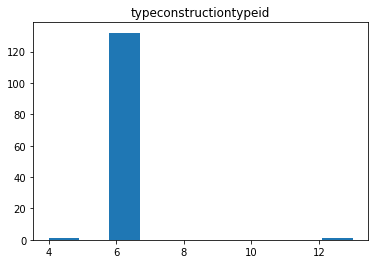

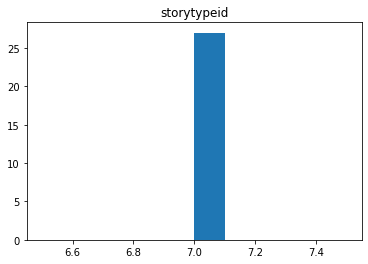

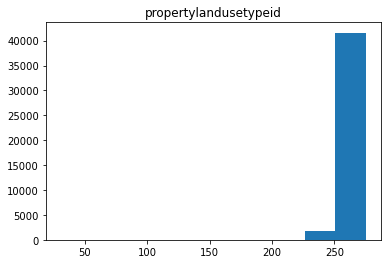

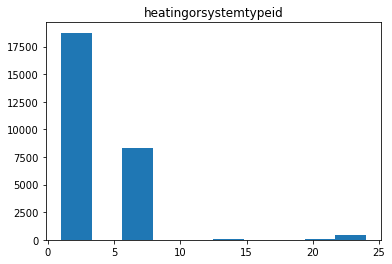

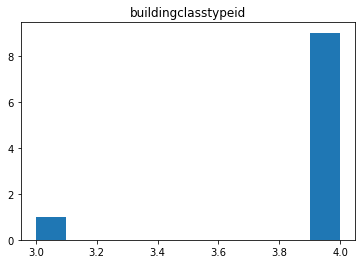

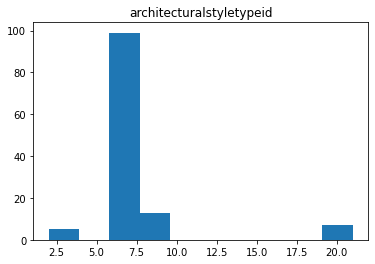

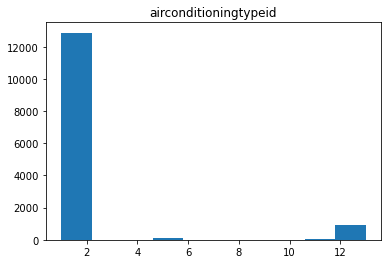

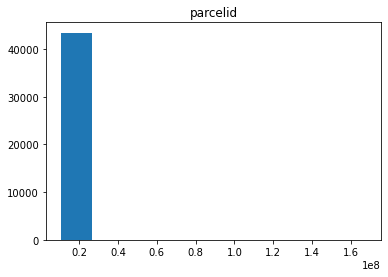

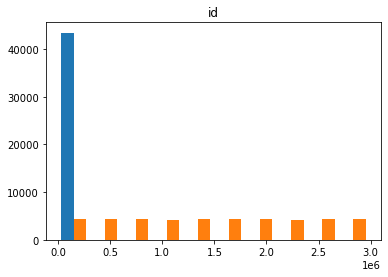

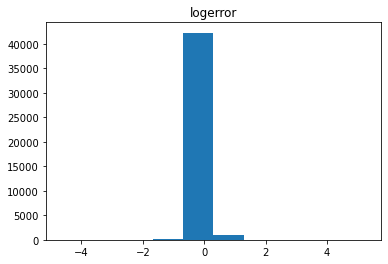

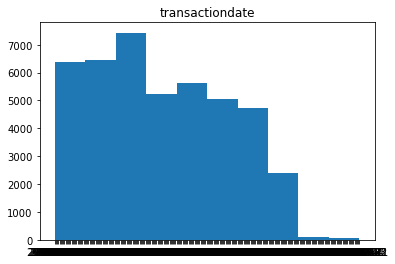

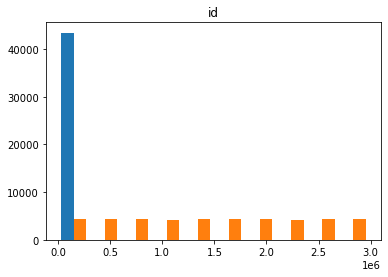

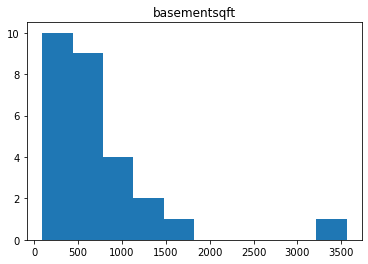

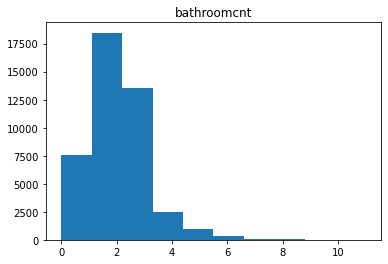

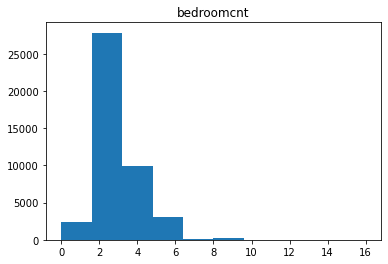

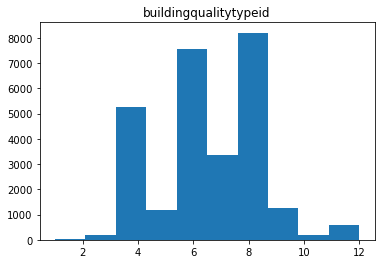

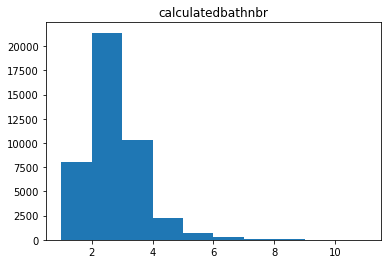

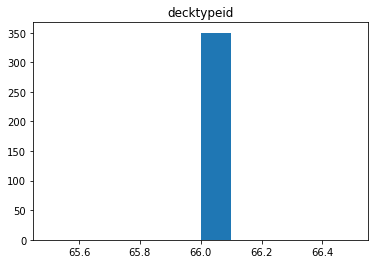

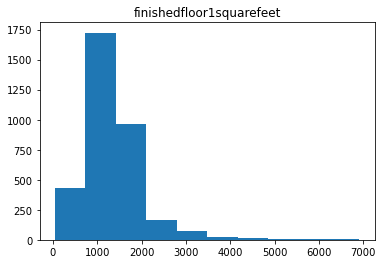

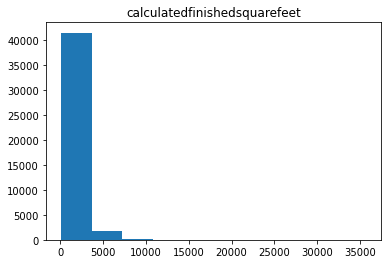

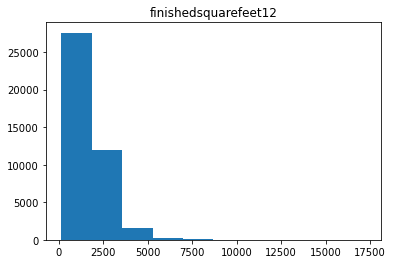

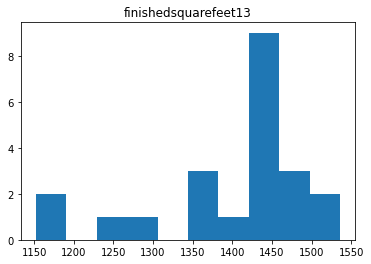

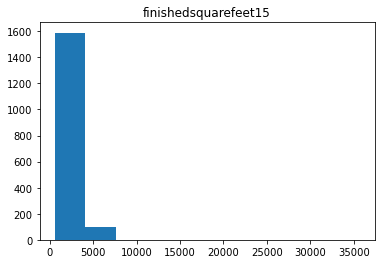

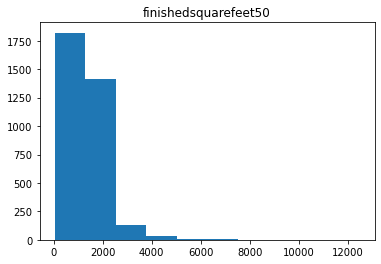

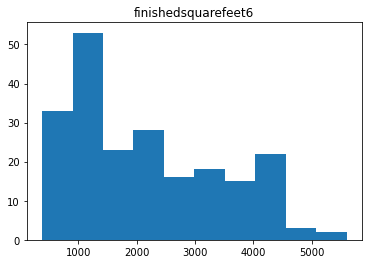

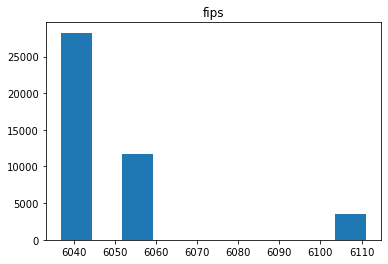

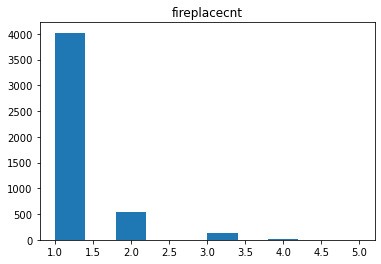

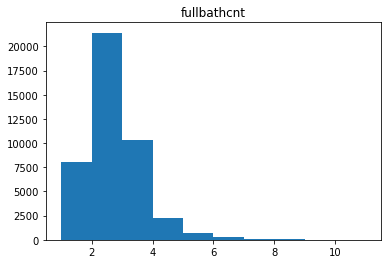

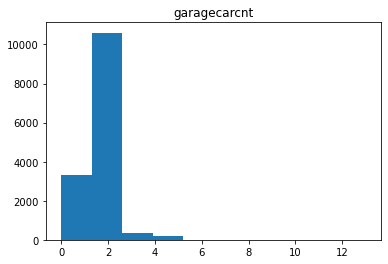

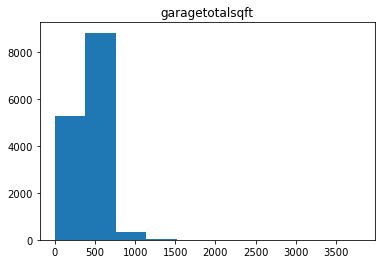

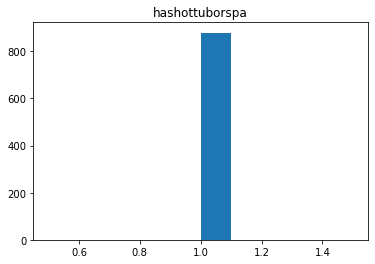

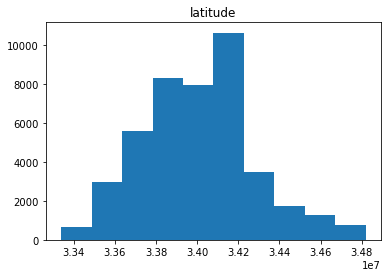

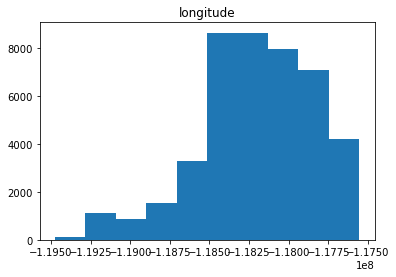

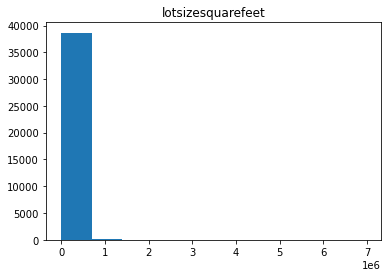

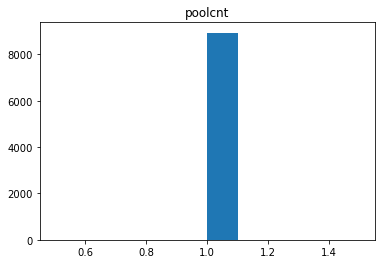

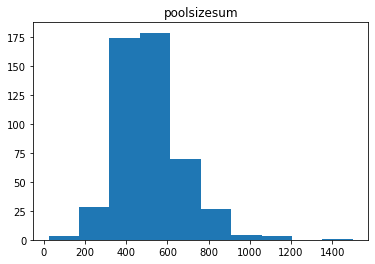

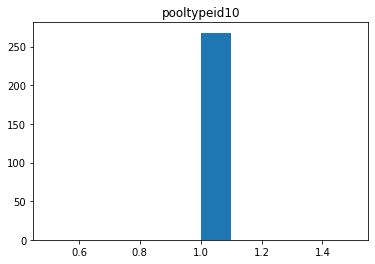

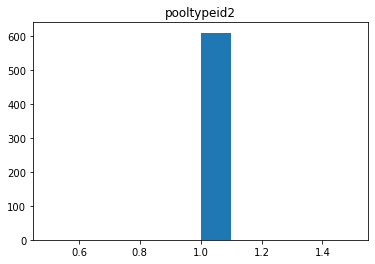

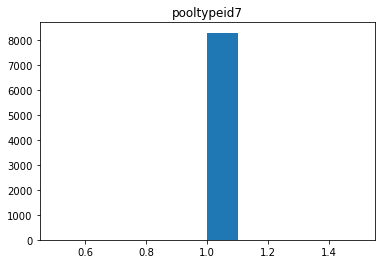

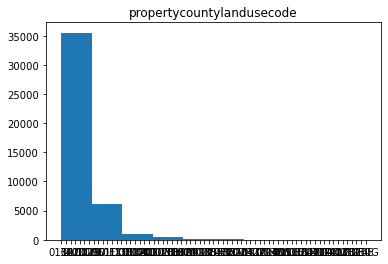

TypeError: 'value' must be an instance of str or bytes, not a NoneType

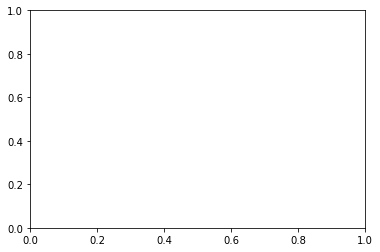

In [9]:
#take a look at the distributions to see if we should bin anything 
#or if there could be some visual relationships

#look at all columns distribution
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<hr style="border:2px solid black"> </hr>

#### B. Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County

In [ ]:
sns.boxplot(train.fips, train.logerror)
plt.title('logerror by county')

#### Takeaways:
   - our targets are mostly "normal"
   - Levene $H_0$: variance in logerror in Orange County (fips 6059) and LA are equivalent

In [ ]:
stats.levene(train[train.fips == '6037.0'].logerror, train[train.fips == '6059.0'].logerror)

In [ ]:
# Reject Levene H0, proceed with presumption of inequal variance

$H_0$: Mean logerror in Orange County is equivalent to Mean Error in LA

In [ ]:
#2 tailed, T-Test
stats.ttest_ind(train[train.fips == '6037.0'].logerror, train[train.fips == '6059.0'].logerror, equal_var= False)

#### Takeaways:
   - There is a significance in location

<hr style="border:2px solid black"> </hr>

#### C.  Is there a relationship between logerror and total sqft of the property?

Relationship between Sqft and Logerror?


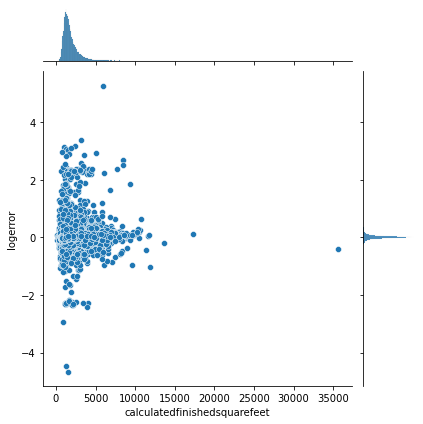

In [10]:
print('Relationship between Sqft and Logerror?')
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("Total Square Feet")
plt.ylabel("Log Error")
plt.show()

#go back and remove outliers

#Takeaways:
- There appears to be no distinct clusters

<hr style="border:2px solid black"> </hr>

#### D. Is there a relationship between latitude and logitude

Relationship between Bedroom count and Logerror?


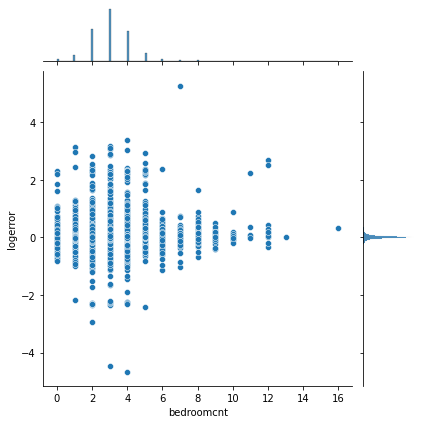

In [12]:
#take a look at bedrooms too
print('Relationship between Bedroom count and Logerror?')
sns.jointplot(x="bedroomcnt", y="logerror", data=train)
plt.xlabel("Total Bedrooms")
plt.ylabel("Log Error")
plt.show()

#go back and remove outliers

Levene $H_0$: Variance in logerror for homes in 5 or lkess bedrooms is equal to those with more than 5 bedrooms

In [13]:
stats.levene(train[train.bedroomcnt >5].logerror, train[train.bedroomcnt<=5].logerror)

LeveneResult(statistic=99.42249219101166, pvalue=2.1616025618622608e-23)

Takeaways:
   - presume equal variance. Cannot reject the $H_0$

In [15]:
stats.ttest_ind(train[train.bedroomcnt >5].logerror, train[train.bedroomcnt<=5].logerror, equal_var=True)

Ttest_indResult(statistic=4.023721134069623, pvalue=5.738267446538486e-05)

Takeaways:
   - Reject the $H_0$: there is a significant difference in the mean logerror in homes with 5 or bedrooms compared to those with less

<hr style="border:2px solid black"> </hr>

#### E. Accounting for bedroom counts, is there a relationship between logerror and lat/long.

In [19]:
train['abs_logerr'] = train.logerror.apply(lambda x:x if x>=0 else -x)

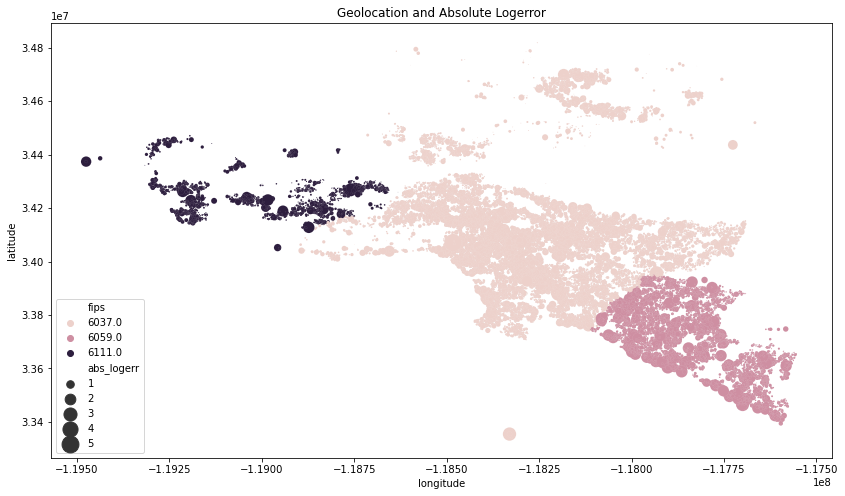

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue= 'fips', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

In [22]:
train['bedroom_bin'] = pd.cut(train.bedroomcnt, [0,4,10])

In [23]:
train.bedroom_bin.value_counts()

(0, 4]     39568
(4, 10]     3392
Name: bedroom_bin, dtype: int64

In [25]:
train[train.bedroomcnt <=4].shape

(40034, 71)

<hr style="border:2px solid black"> </hr>

#### Bonus:
Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [28]:
fips_with_significantly_different_errors=[]
zips=train.fips.unique()

In [29]:
zips

array([6037., 6059., 6111.])

In [30]:
#one sample T-Test (each county to overall error)
population_logerror_mean = train.logerror.mean() #<-- overall mean

In [32]:
#create loop to do T-Test
for zipc in zips:
    #1sample t-test
    t, p = stats.ttest_1samp(train[train.fips == zip].logerror, population_logerror_mean)
    #set alpha
    if p <0.05:
        fips_with_significantly_different_errors.append(zipc)

In [33]:
#this shows with fips have different log errors
fips_with_significantly_different_errors

[6037.0, 6059.0, 6111.0]